In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.pyplot import cm
import matplotlib as mpl
import seaborn as sns
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['axes.titlesize'] = 13
mpl.rcParams['axes.labelsize'] = 13
mpl.rcParams['xtick.labelsize'] = 13
mpl.rcParams['ytick.labelsize'] = 13
mpl.rcParams['legend.fontsize'] = 13
mpl.rcParams['font.size'] = 13

In [2]:
rs=19011539 ## Random_state fixed to reproducibility

## Loading Data:

In [3]:
data=pd.read_csv("garments_worker_productivity.csv")

In [4]:
data.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [5]:
data.select_dtypes(include=np.number).columns, data.select_dtypes(include=np.object_).columns

(Index(['team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
        'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers',
        'actual_productivity'],
       dtype='object'),
 Index(['date', 'quarter', 'department', 'day'], dtype='object'))

## Data Mining: Coding variables and get dummies variables.

In [6]:
data["year2"]=data["date"].str.split("/").str[2].astype(np.int64)
data["day2"]=data["date"].str.split("/").str[1].astype(np.int64)
data["month2"]=data["date"].str.split("/").str[0].astype(np.int64)
#dict1={"Quarter1":1,"Quarter2":2,"Quarter3":3,"Quarter4":4,"Quarter5":5}
#dict2={"Monday":1,"Tuesday":2,"Wednesday":3,"Thursday":4,"Friday":5,"Saturday":6,"Sunday":7}
dict3={'sweing':'sweing', 'finishing ':'finishing', 'finishing':'finishing'}
#data["quarter2"]=data["quarter"].map(dict1)
#data["day3"]=data["day"].map(dict2)
data["department"]=data["department"].map(dict3)

In [7]:
data.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,year2,day2,month2
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,2015,1,1
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500,2015,1,1
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,2015,1,1
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,2015,1,1
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,2015,1,1


In [8]:
data0=data.copy()
data0=data0.select_dtypes(include=np.number)
data = pd.get_dummies(data, columns = ['quarter', 'department', 'day']) 
data=data.select_dtypes(include=np.number)

In [9]:
data.columns

Index(['team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers',
       'actual_productivity', 'year2', 'day2', 'month2', 'quarter_Quarter1',
       'quarter_Quarter2', 'quarter_Quarter3', 'quarter_Quarter4',
       'quarter_Quarter5', 'department_finishing', 'department_sweing',
       'day_Monday', 'day_Saturday', 'day_Sunday', 'day_Thursday',
       'day_Tuesday', 'day_Wednesday'],
      dtype='object')

In [10]:
data0.columns

Index(['team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers',
       'actual_productivity', 'year2', 'day2', 'month2'],
      dtype='object')

In [11]:
# Printing Null values or missing data values
print("Missing data for variable wip is",round(data["wip"].isnull().sum()/len(data)*100,2),"percent!")
pd.DataFrame(data.isnull().sum()).T

Missing data for variable wip is 42.27 percent!


,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,...,quarter_Quarter4,quarter_Quarter5,department_finishing,department_sweing,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,0,0,0,506,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
pd.DataFrame(data.describe()).T

,count,mean,std,min,25%,50%,75%,max
team,1197.0,6.426901,3.463963,1.000000,3.000000,6.000000,9.000000,12.000000
targeted_productivity,1197.0,0.729632,0.097891,0.070000,0.700000,0.750000,0.800000,0.800000
smv,1197.0,15.062172,10.943219,2.900000,3.940000,15.260000,24.260000,54.560000
wip,691.0,1190.465991,1837.455001,7.000000,774.500000,1039.000000,1252.500000,23122.000000
over_time,1197.0,4567.460317,3348.823563,0.000000,1440.000000,3960.000000,6960.000000,25920.000000
incentive,1197.0,38.210526,160.182643,0.000000,0.000000,0.000000,50.000000,3600.000000
idle_time,1197.0,0.730159,12.709757,0.000000,0.000000,0.000000,0.000000,300.000000
idle_men,1197.0,0.369256,3.268987,0.000000,0.000000,0.000000,0.000000,45.000000
no_of_style_change,1197.0,0.150376,0.427848,0.000000,0.000000,0.000000,0.000000,2.000000
no_of_workers,1197.0,34.609858,22.197687,2.000000,9.000000,34.000000,57.000000,89.000000


In [13]:
data2=data.dropna()

## Imputing variable "wip"

In [14]:
# Creating a function to get imputation over variables
def impute_nan_meanmedian(df, variable, value, rnd=1):
    if value=="median":
        val=df[variable].median()
    if value=="mean":
        val=df[variable].mean()
    df[variable+"_"+value]=df[variable].fillna(val)
    df[variable+"_"+value]=df[variable+"_"+value].round(rnd)
    return df
import random
def rand_float_range(start, end):
    return random.random() * (end - start) + start

def impute_nan_random(df, variable, value=-9, rnd=1):
    if value!=-9:
        df[variable+"_random_fixed"]=df[variable].fillna(value)
        df[variable+"_random_fixed"]=df[variable+"_random_fixed"].round(rnd)
    else:
        start,end=df[variable].min(),df[variable].max()
        df[variable+"_random"]=df[variable].fillna(rand_float_range(start,end))
        df[variable+"_random"]=df[variable+"_random"].round(1)
    return df

In [15]:
from sklearn.impute import KNNImputer
def imputer_knn(data,neig=5):
    datanew = data.select_dtypes(include=np.number)
    # define imputer
    imputer = KNNImputer(n_neighbors=neig, weights='distance', metric='nan_euclidean',add_indicator=False)
    # fit on the dataset
    imputer.fit(datanew)
    # transform the dataset
    Xtrans = imputer.transform(datanew)
    Xtrans=pd.DataFrame(Xtrans,columns=datanew.columns)
    datanew["wip_knn_"+str(neig)]=Xtrans["wip"].round()
    return datanew

In [16]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.metrics import mean_squared_error

In [17]:
def make_imputation(data_file):
    datanew = data_file.select_dtypes(include=np.number)
    # Mean Imputation
    mean_imputer = SimpleImputer(strategy='mean')
    mean_imputed = mean_imputer.fit_transform(np.array(datanew["wip"]).reshape(-1, 1))
    datanew["wip_mean"]=np.round(mean_imputed)

    # Median Imputation
    mean_imputer = SimpleImputer(strategy='median')
    mean_imputed = mean_imputer.fit_transform(np.array(datanew["wip"]).reshape(-1, 1))
    datanew["wip_median"]=np.round(mean_imputed)

    # Iterative Imputation
    iter_imputer = IterativeImputer(random_state=rs)
    Xtrans = iter_imputer.fit_transform(datanew)
    Xtrans=pd.DataFrame(Xtrans,columns=datanew.columns)
    datanew["wip_iter"]=Xtrans["wip"].round()
    return datanew

In [18]:
data=imputer_knn(data,neig=5)
data=make_imputation(data)
data0=imputer_knn(data0,neig=5)
data0=make_imputation(data0)

In [19]:
data.columns

Index(['team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers',
       'actual_productivity', 'year2', 'day2', 'month2', 'quarter_Quarter1',
       'quarter_Quarter2', 'quarter_Quarter3', 'quarter_Quarter4',
       'quarter_Quarter5', 'department_finishing', 'department_sweing',
       'day_Monday', 'day_Saturday', 'day_Sunday', 'day_Thursday',
       'day_Tuesday', 'day_Wednesday', 'wip_knn_5', 'wip_mean', 'wip_median',
       'wip_iter'],
      dtype='object')

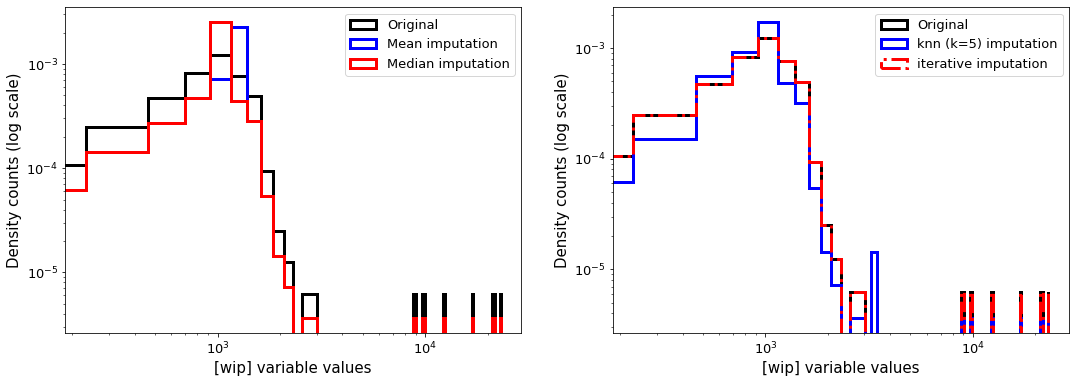

In [20]:
plt.figure(figsize=(18,6))
b=100
plt.subplot(121)
r=[0,data["wip"].max()]
plt.hist(data["wip"],bins=b,density=True,cumulative=False,range=r,label="Original",histtype="step",lw=3,color='k')
plt.hist(data["wip_mean"],bins=b,density=True,cumulative=False,range=r,label="Mean imputation",histtype="step",lw=3,color='b')
plt.hist(data["wip_median"],bins=b,density=True,cumulative=False,range=r,label="Median imputation",histtype="step",lw=3,color='r')
plt.legend()
plt.yscale("log")
plt.xscale("log")
plt.ylabel("Density counts (log scale)",fontsize=15)
plt.xlabel("[wip] variable values",fontsize=15)
plt.subplot(122)
plt.hist(data["wip"],bins=b,density=True,cumulative=False,range=r,label="Original",histtype="step",lw=3,color='k')
plt.hist(data["wip_knn_5"],bins=b,density=True,cumulative=False,range=r,label="knn (k=5) imputation",histtype="step",lw=3,color='b')
plt.hist(data["wip_iter"],bins=b,density=True,cumulative=False,range=r,label="iterative imputation",histtype="step",lw=3,linestyle='-.',color='r')
plt.legend()
plt.yscale("log")
plt.xscale("log")
plt.ylabel("Density counts (log scale)",fontsize=15)
plt.xlabel("[wip] variable values",fontsize=15)
plt.savefig("imputation_fig.pdf",bbox_inches='tight')
plt.show()

## Developing Random Forest algorith to predict

In [21]:
from sklearn.model_selection import train_test_split# Split the data into training and testing sets
from sklearn.ensemble import RandomForestRegressor# Instantiate model with 1000 decision trees
from sklearn.model_selection import GridSearchCV

In [22]:
def make_RF(var='wip_knn_25',pr=True,plot2=False):
    # Labels are the values we want to predict
    labels = np.array(data0['actual_productivity'])# Remove the labels from the features
    # axis 1 refers to the columns
    features=data0[['team', 'targeted_productivity', 'smv', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers',
       'year2', 'day2', 'month2', var]]#
    # Saving feature names for later use
    feature_list = list(features.columns)
    # Convert to numpy array
    features = np.array(features)
    # Using Skicit-learn to split data into training and testing sets
    train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = rs)
    
    rf_param_grid = {
     'n_estimators':[100, 200, 400, 600, 800, 1000],
     'max_depth': [10, 15, 20, 25, 30]}
    
    rfm = RandomForestRegressor(random_state = rs)
    
    grid_rfe = GridSearchCV(estimator = rfm, param_grid = rf_param_grid, scoring = 'neg_mean_squared_error', cv = 5, verbose = 1)
    
    grid_rfe.fit(train_features, train_labels)
    best=grid_rfe.best_params_
    print("Best parameters found: ",best)
    print("Lowest RMSE found: ", np.sqrt(np.abs(grid_rfe.best_score_)))
    
    # max_features={"auto", "sqrt", "log2"}
    rf = RandomForestRegressor(**best,random_state = rs)#(n_estimators = ne, random_state = rs,max_features="auto")
    # Train the model on training data
    rf.fit(train_features, train_labels)
    # Use the forest's predict method on the test data
    predictions = rf.predict(features)
    # Calculate the absolute and square errors
    errors = abs(predictions - labels)
    errors2 = (predictions - labels)**2
    # Calculate mean absolute percentage error (MAPE)
    mape = 100 * (errors / labels)
    # Calculate and display accuracy
    accuracy = 100 - np.mean(mape)
    # Correlation:
    corrcoef=np.corrcoef(labels,predictions)[0][1]
    # Get numerical feature importances
    importances = rf.feature_importances_.astype(np.float64)
    # List of tuples with variable and importance
    #feature_importances = np.array([[feature, round(importance.astype("float64"), 2)] for feature, importance in zip(feature_list, importances)])
    # Sort the feature importances by most important first
    feature_importances = pd.DataFrame(np.array([feature_list,np.round(importances,2)]).T,
                                       columns=["Features","Importances"]).sort_values(by="Importances",ascending=False)
    feature_importances["Importances"]=feature_importances["Importances"].astype(np.float64)
    feature_importances2=feature_importances[:10]

    if pr:
        # Print out the mean absolute error (mae)
        print('Mean Absolute Error (MAE):', round(np.mean(errors), 4))
        # Print out the mean square error (mse)
        print('Mean Square Error (MSE):', round(np.mean(errors2), 4))
        print('Root Mean Square Error (RMSE):', round(np.sqrt(np.mean(errors2)), 4))
        # Print out the mape (mape)
        print('Mean Absolute Percentage Error (MAPE):', round(np.mean(mape), 4))
        print('Accuracy:', round(accuracy, 2), '%.')
        print('Correlation coeficient:', round(corrcoef, 2))
        # Print out the feature and importances 
        #print(feature_importances)
    if plot2:
        plt.figure(figsize=(18,6))
        plt.subplot(121)
        plt.barh(feature_importances2["Features"][::-1], feature_importances2["Importances"][::-1]*100, label="Feature importances (RF)", color="b")
        plt.xlabel("Importances (%)",fontsize=15)
        plt.grid(axis='x')
        plt.legend(ncol=2, loc="lower right", frameon=True)
        plt.subplot(122)
        plt.scatter(labels,predictions,color='b',s=20,marker='o', facecolors='none')
        plt.plot(np.linspace(0.23,1.12,5),np.linspace(0.23,1.12,5),c='k')
        plt.xlabel("Original data",fontsize=15)
        plt.ylabel("Predictions",fontsize=15)
        plt.show()
    return predictions,feature_importances#rs,round(accuracy,2),round(corrcoef,4),round(np.mean(errors),4),round(np.sqrt(np.mean(errors2)),4)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters found:  {'max_depth': 15, 'n_estimators': 800}
Lowest RMSE found:  0.12729708612957763
Mean Absolute Error (MAE): 0.0411
Mean Square Error (MSE): 0.0056
Root Mean Square Error (RMSE): 0.0748
Mean Absolute Percentage Error (MAPE): 6.9962
Accuracy: 93.0 %.
Correlation coeficient: 0.91


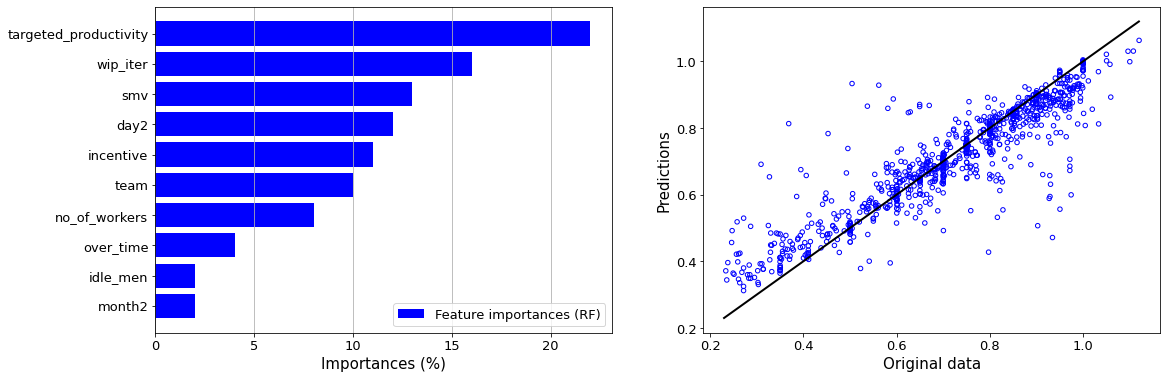

In [23]:
a1=make_RF('wip_iter',True,True)

In [24]:
def make_RF2(var='wip_knn_25',pr=True,plot2=False):
    # Labels are the values we want to predict
    labels = np.array(data['actual_productivity'])# Remove the labels from the features
    # axis 1 refers to the columns
    features=data[['team', 'targeted_productivity', 'smv', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers',
       'year2', 'day2', 'month2', 'quarter_Quarter1',
       'quarter_Quarter2', 'quarter_Quarter3', 'quarter_Quarter4',
       'quarter_Quarter5', 'department_finishing', 'department_sweing',
       'day_Monday', 'day_Saturday', 'day_Sunday', 'day_Thursday',
       'day_Tuesday', 'day_Wednesday', var]]#
    # Saving feature names for later use
    feature_list = list(features.columns)
    # Convert to numpy array
    features = np.array(features)
    # Using Skicit-learn to split data into training and testing sets
    train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = rs)
    
    rf_param_grid = {
     'n_estimators':[100, 200, 400, 600, 800, 1000],
     'max_depth': [10, 15, 20, 25, 30]}
    
    rfm = RandomForestRegressor(random_state = rs)
    
    grid_rfe = GridSearchCV(estimator = rfm, param_grid = rf_param_grid, scoring = 'neg_mean_squared_error', cv = 5, verbose = 1)
    
    grid_rfe.fit(train_features, train_labels)
    best=grid_rfe.best_params_
    print("Best parameters found: ",best)
    print("Lowest RMSE found: ", np.sqrt(np.abs(grid_rfe.best_score_)))
    
    # max_features={"auto", "sqrt", "log2"}
    rf = RandomForestRegressor(**best,random_state = rs)#(n_estimators = ne, random_state = rs,max_features="auto")
    # Train the model on training data
    rf.fit(train_features, train_labels)
    # Use the forest's predict method on the test data
    predictions = rf.predict(features)
    # Calculate the absolute and square errors
    errors = abs(predictions - labels)
    errors2 = (predictions - labels)**2
    # Calculate mean absolute percentage error (MAPE)
    mape = 100 * (errors / labels)
    # Calculate and display accuracy
    accuracy = 100 - np.mean(mape)
    # Correlation:
    corrcoef=np.corrcoef(labels,predictions)[0][1]
    # Get numerical feature importances
    importances = rf.feature_importances_.astype(np.float64)
    # List of tuples with variable and importance
    #feature_importances = np.array([[feature, round(importance.astype("float64"), 2)] for feature, importance in zip(feature_list, importances)])
    # Sort the feature importances by most important first
    feature_importances = pd.DataFrame(np.array([feature_list,np.round(importances,2)]).T,
                                       columns=["Features","Importances"]).sort_values(by="Importances",ascending=False)
    feature_importances["Importances"]=feature_importances["Importances"].astype(np.float64)
    feature_importances2=feature_importances[:10]

    if pr:
        # Print out the mean absolute error (mae)
        print('Mean Absolute Error (MAE):', round(np.mean(errors), 4))
        # Print out the mean square error (mse)
        print('Mean Square Error (MSE):', round(np.mean(errors2), 4))
        print('Root Mean Square Error (RMSE):', round(np.sqrt(np.mean(errors2)), 4))
        # Print out the mape (mape)
        print('Mean Absolute Percentage Error (MAPE):', round(np.mean(mape), 4))
        print('Accuracy:', round(accuracy, 2), '%.')
        print('Correlation coeficient:', round(corrcoef, 2))
        # Print out the feature and importances 
        #print(feature_importances)
    if plot2:
        plt.figure(figsize=(18,6))
        plt.subplot(121)
        plt.barh(feature_importances2["Features"][::-1], feature_importances2["Importances"][::-1]*100, label="Feature importances (RF)", color="b")
        plt.xlabel("Importances (%)",fontsize=15)
        plt.grid(axis='x')
        plt.legend(ncol=2, loc="lower right", frameon=True)
        plt.subplot(122)
        plt.scatter(labels,predictions,color='b',s=20,marker='o', facecolors='none')
        plt.plot(np.linspace(0.23,1.12,5),np.linspace(0.23,1.12,5),c='k')
        plt.xlabel("Original data",fontsize=15)
        plt.ylabel("Predictions",fontsize=15)
        plt.show()
    return predictions,feature_importances#rs,round(accuracy,2),round(corrcoef,4),round(np.mean(errors),4),round(np.sqrt(np.mean(errors2)),4)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters found:  {'max_depth': 15, 'n_estimators': 600}
Lowest RMSE found:  0.12885874436347797
Mean Absolute Error (MAE): 0.0406
Mean Square Error (MSE): 0.0051
Root Mean Square Error (RMSE): 0.0715
Mean Absolute Percentage Error (MAPE): 6.923
Accuracy: 93.08 %.
Correlation coeficient: 0.92


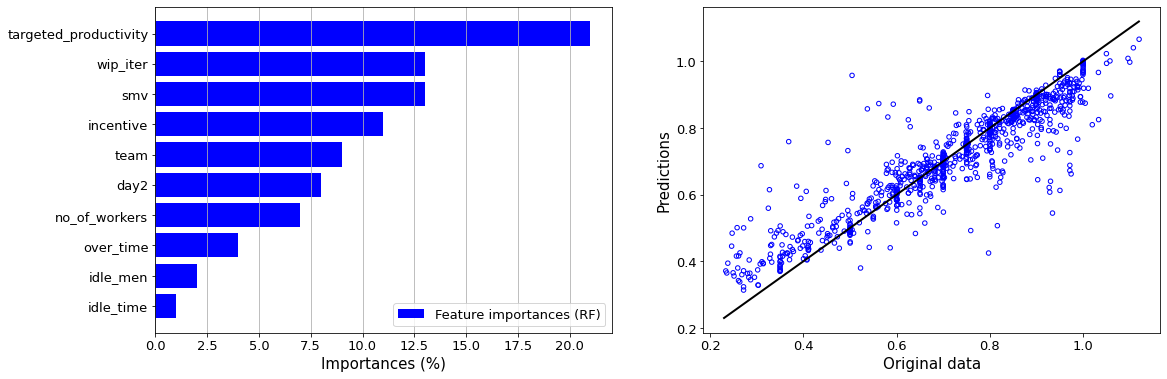

In [25]:
a2=make_RF2('wip_iter',True,True)

## Developing GradientBoosting Regressor to predict...

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
import xgboost as xgb

/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 1.1build1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(


In [27]:
def make_XGB(var='wip_knn_25',pr=False,plot2=False):
    # Labels are the values we want to predict
    labels = np.array(data0['actual_productivity'])# Remove the labels from the features
    # axis 1 refers to the columns
    features=data0[['team', 'targeted_productivity', 'smv', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers',
       'year2', 'day2', 'month2', var]]#
    # Saving feature names for later use
    feature_list = list(features.columns)
    # Convert to numpy array
    features = np.array(features)

    X_train, X_test, y_train, y_test = train_test_split(features, labels, random_state=rs, test_size=0.25)
    
    gbm_param_grid = {
     'colsample_bytree': np.linspace(0.5, 0.9, 5),
     'n_estimators':[100, 400, 600, 1000],
     'max_depth': [10, 15, 20, 25, 30],
#    'learning_rate': [0.1,0.01,0.001]
    }
    
    gbm = xgb.XGBRegressor(random_state = rs)
    
    grid_mse = GridSearchCV(estimator = gbm, param_grid = gbm_param_grid, scoring = 'neg_mean_squared_error', cv = 5, verbose = 1)
    
    grid_mse.fit(X_train, y_train)
    best=grid_mse.best_params_
    print("Best parameters found: ",best)
    print("Lowest RMSE found: ", np.sqrt(np.abs(grid_mse.best_score_)))
    
    gbm = xgb.XGBRegressor(**best,random_state = rs)
    gbm.fit(X_train, y_train)
    
    predictions = gbm.predict(features)
    print("Root mean square error for test dataset: {}".format(np.round(np.sqrt(mean_squared_error(labels, predictions)), 2)))
    # Calculate the absolute and square errors
    errors = abs(predictions - labels)
    errors2 = (predictions - labels)**2
    # Calculate mean absolute percentage error (MAPE)
    mape = 100 * (errors / labels)
    # Calculate and display accuracy
    accuracy = 100 - np.mean(mape)
    # Correlation:
    corrcoef=np.corrcoef(labels,predictions)[0][1]
    # Get numerical feature importances
    importances = gbm.feature_importances_.astype(np.float64)
    # List of tuples with variable and importance
    #feature_importances = np.array([[feature, round(importance.astype("float64"), 2)] for feature, importance in zip(feature_list, importances)])
    # Sort the feature importances by most important first
    feature_importances = pd.DataFrame(np.array([feature_list,np.round(importances,2)]).T,
                                       columns=["Features","Importances"]).sort_values(by="Importances",ascending=False)
    feature_importances["Importances"]=feature_importances["Importances"].astype(np.float64)
    feature_importances2=feature_importances[:10]

    if pr:
        # Print out the mean absolute error (mae)
        print('Mean Absolute Error (MAE):', round(np.mean(errors), 4))
        # Print out the mean square error (mse)
        print('Mean Square Error (MSE):', round(np.mean(errors2), 4))
        print('Root Mean Square Error (RMSE):', round(np.sqrt(np.mean(errors2)), 4))
        # Print out the mape (mape)
        print('Mean Absolute Percentage Error (MAPE):', round(np.mean(mape), 4))
        print('Accuracy:', round(accuracy, 2), '%.')
        print('Correlation coeficient:', round(corrcoef, 2))
        # Print out the feature and importances 
        #print(feature_importances)
    if plot2:
        plt.figure(figsize=(18,6))
        plt.subplot(121)
        plt.barh(feature_importances2["Features"][::-1], feature_importances2["Importances"][::-1]*100, label="Feature importances (RF)", color="b")
        plt.xlabel("Importances (%)",fontsize=15)
        plt.grid(axis='x')
        plt.legend(ncol=2, loc="lower right", frameon=True)
        plt.subplot(122)
        plt.scatter(labels,predictions,color='b',s=20,marker='o', facecolors='none')
        plt.plot(np.linspace(0.23,1.12,5),np.linspace(0.23,1.12,5),c='k')
        plt.xlabel("Original data",fontsize=15)
        plt.ylabel("Predictions",fontsize=15)
        plt.show()
    return predictions,feature_importances#rs,round(accuracy,2),round(corrcoef,4),round(np.mean(errors),4),round(np.sqrt(np.mean(errors2)),4)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found:  {'colsample_bytree': 0.8, 'max_depth': 20, 'n_estimators': 100}
Lowest RMSE found:  0.13421464549223663
Root mean square error for test dataset: 0.07
Mean Absolute Error (MAE): 0.0212
Mean Square Error (MSE): 0.0045
Root Mean Square Error (RMSE): 0.0673
Mean Absolute Percentage Error (MAPE): 3.2512
Accuracy: 96.75 %.
Correlation coeficient: 0.92


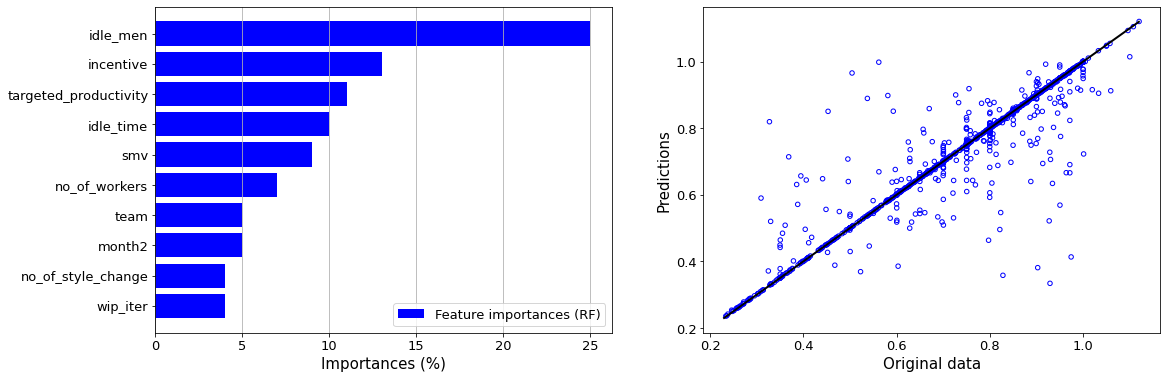

In [28]:
b1=make_XGB('wip_iter',True,True)

In [29]:
def make_XGB2(var='wip_knn_25',pr=False,plot2=False):
    # Labels are the values we want to predict
    labels = np.array(data['actual_productivity'])# Remove the labels from the features
    # axis 1 refers to the columns
    features=data[['team', 'targeted_productivity', 'smv', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers',
       'year2', 'day2', 'month2', 'quarter_Quarter1',
       'quarter_Quarter2', 'quarter_Quarter3', 'quarter_Quarter4',
       'quarter_Quarter5', 'department_finishing', 'department_sweing',
       'day_Monday', 'day_Saturday', 'day_Sunday', 'day_Thursday',
       'day_Tuesday', 'day_Wednesday', var]]#
    # Saving feature names for later use
    feature_list = list(features.columns)
    # Convert to numpy array
    features = np.array(features)

    X_train, X_test, y_train, y_test = train_test_split(features, labels, random_state=rs, test_size=0.25)
    
    gbm_param_grid = {
     'colsample_bytree': np.linspace(0.5, 0.9, 5),
     'n_estimators':[100, 400, 600, 1000],
     'max_depth': [10, 15, 20, 25, 30],
#    'learning_rate': [0.1,0.01,0.001]
    }
    
    gbm = xgb.XGBRegressor(random_state = rs)
    
    grid_mse = GridSearchCV(estimator = gbm, param_grid = gbm_param_grid, scoring = 'neg_mean_squared_error', cv = 5, verbose = 1)
    
    grid_mse.fit(X_train, y_train)
    best=grid_mse.best_params_
    print("Best parameters found: ",best)
    print("Lowest RMSE found: ", np.sqrt(np.abs(grid_mse.best_score_)))
    
    gbm = xgb.XGBRegressor(**best,random_state = rs)
    gbm.fit(X_train, y_train)
    
    predictions = gbm.predict(features)
    print("Root mean square error for test dataset: {}".format(np.round(np.sqrt(mean_squared_error(labels, predictions)), 2)))
    # Calculate the absolute and square errors
    errors = abs(predictions - labels)
    errors2 = (predictions - labels)**2
    # Calculate mean absolute percentage error (MAPE)
    mape = 100 * (errors / labels)
    # Calculate and display accuracy
    accuracy = 100 - np.mean(mape)
    # Correlation:
    corrcoef=np.corrcoef(labels,predictions)[0][1]
    # Get numerical feature importances
    importances = gbm.feature_importances_.astype(np.float64)
    # List of tuples with variable and importance
    #feature_importances = np.array([[feature, round(importance.astype("float64"), 2)] for feature, importance in zip(feature_list, importances)])
    # Sort the feature importances by most important first
    feature_importances = pd.DataFrame(np.array([feature_list,np.round(importances,2)]).T,
                                       columns=["Features","Importances"]).sort_values(by="Importances",ascending=False)
    feature_importances["Importances"]=feature_importances["Importances"].astype(np.float64)
    feature_importances2=feature_importances[:10]

    if pr:
        # Print out the mean absolute error (mae)
        print('Mean Absolute Error (MAE):', round(np.mean(errors), 4))
        # Print out the mean square error (mse)
        print('Mean Square Error (MSE):', round(np.mean(errors2), 4))
        print('Root Mean Square Error (RMSE):', round(np.sqrt(np.mean(errors2)), 4))
        # Print out the mape (mape)
        print('Mean Absolute Percentage Error (MAPE):', round(np.mean(mape), 4))
        print('Accuracy:', round(accuracy, 2), '%.')
        print('Correlation coeficient:', round(corrcoef, 2))
        # Print out the feature and importances 
        #print(feature_importances)
    if plot2:
        plt.figure(figsize=(18,6))
        plt.subplot(121)
        plt.barh(feature_importances2["Features"][::-1], feature_importances2["Importances"][::-1]*100, label="Feature importances (RF)", color="b")
        plt.xlabel("Importances (%)",fontsize=15)
        plt.grid(axis='x')
        plt.legend(ncol=2, loc="lower right", frameon=True)
        plt.subplot(122)
        plt.scatter(labels,predictions,color='b',s=20,marker='o', facecolors='none')
        plt.plot(np.linspace(0.23,1.12,5),np.linspace(0.23,1.12,5),c='k')
        plt.xlabel("Original data",fontsize=15)
        plt.ylabel("Predictions",fontsize=15)
        plt.show()
    return predictions,feature_importances#rs,round(accuracy,2),round(corrcoef,4),round(np.mean(errors),4),round(np.sqrt(np.mean(errors2)),4)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found:  {'colsample_bytree': 0.7, 'max_depth': 25, 'n_estimators': 100}
Lowest RMSE found:  0.1339459959128959
Root mean square error for test dataset: 0.06
Mean Absolute Error (MAE): 0.02
Mean Square Error (MSE): 0.0038
Root Mean Square Error (RMSE): 0.0619
Mean Absolute Percentage Error (MAPE): 3.0764
Accuracy: 96.92 %.
Correlation coeficient: 0.94


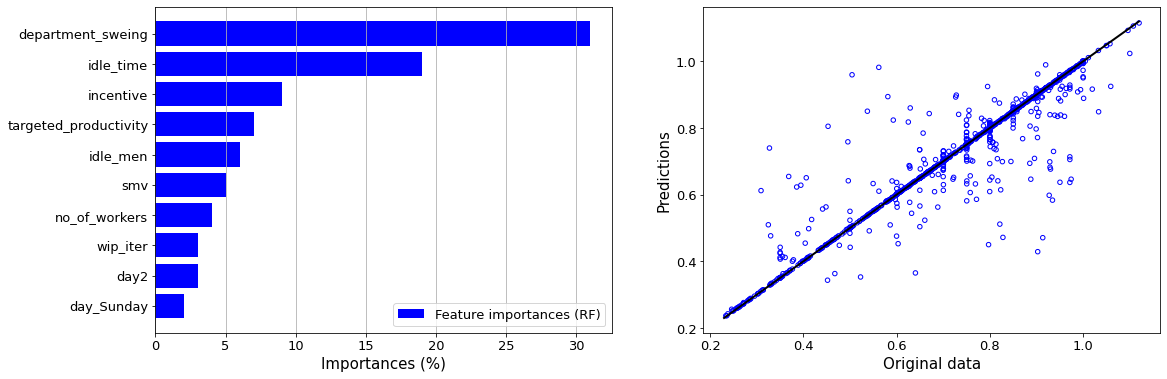

In [30]:
b2=make_XGB2('wip_iter',True,True)

In [33]:
def make_GB(var='wip_knn_25',pr=False,plot2=False):
    # Labels are the values we want to predict
    labels = np.array(data0['actual_productivity'])# Remove the labels from the features
    # axis 1 refers to the columns
    features=data0[['team', 'targeted_productivity', 'smv', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers',
       'year2', 'day2', 'month2', var]]#
    # Saving feature names for later use
    feature_list = list(features.columns)
    # Convert to numpy array
    features = np.array(features)

    X_train, X_test, y_train, y_test = train_test_split(features, labels, random_state=rs, test_size=0.25)
    
    gbm_param_grid = {
     #'colsample_bytree': np.linspace(0.5, 0.9, 5),
     'n_estimators':[100, 400, 600, 1000],
     'max_depth': [10, 15, 20, 25, 30],
#    'learning_rate': [0.1,0.01,0.001]
    }
    
    gbm = GradientBoostingRegressor(random_state = rs)
    
    grid_mse = GridSearchCV(estimator = gbm, param_grid = gbm_param_grid, scoring = 'neg_mean_squared_error', cv = 5, verbose = 1)
    
    grid_mse.fit(X_train, y_train)
    best=grid_mse.best_params_
    print("Best parameters found: ",best)
    print("Lowest RMSE found: ", np.sqrt(np.abs(grid_mse.best_score_)))
    
    gbm = xgb.XGBRegressor(**best,random_state = rs)
    gbm.fit(X_train, y_train)
    
    predictions = gbm.predict(features)
    print("Root mean square error for test dataset: {}".format(np.round(np.sqrt(mean_squared_error(labels, predictions)), 2)))
    # Calculate the absolute and square errors
    errors = abs(predictions - labels)
    errors2 = (predictions - labels)**2
    # Calculate mean absolute percentage error (MAPE)
    mape = 100 * (errors / labels)
    # Calculate and display accuracy
    accuracy = 100 - np.mean(mape)
    # Correlation:
    corrcoef=np.corrcoef(labels,predictions)[0][1]
    # Get numerical feature importances
    importances = gbm.feature_importances_.astype(np.float64)
    # List of tuples with variable and importance
    #feature_importances = np.array([[feature, round(importance.astype("float64"), 2)] for feature, importance in zip(feature_list, importances)])
    # Sort the feature importances by most important first
    feature_importances = pd.DataFrame(np.array([feature_list,np.round(importances,2)]).T,
                                       columns=["Features","Importances"]).sort_values(by="Importances",ascending=False)
    feature_importances["Importances"]=feature_importances["Importances"].astype(np.float64)
    feature_importances2=feature_importances[:10]

    if pr:
        # Print out the mean absolute error (mae)
        print('Mean Absolute Error (MAE):', round(np.mean(errors), 4))
        # Print out the mean square error (mse)
        print('Mean Square Error (MSE):', round(np.mean(errors2), 4))
        print('Root Mean Square Error (RMSE):', round(np.sqrt(np.mean(errors2)), 4))
        # Print out the mape (mape)
        print('Mean Absolute Percentage Error (MAPE):', round(np.mean(mape), 4))
        print('Accuracy:', round(accuracy, 2), '%.')
        print('Correlation coeficient:', round(corrcoef, 2))
        # Print out the feature and importances 
        #print(feature_importances)
    if plot2:
        plt.figure(figsize=(18,6))
        plt.subplot(121)
        plt.barh(feature_importances2["Features"][::-1], feature_importances2["Importances"][::-1]*100, label="Feature importances (RF)", color="b")
        plt.xlabel("Importances (%)",fontsize=15)
        plt.grid(axis='x')
        plt.legend(ncol=2, loc="lower right", frameon=True)
        plt.subplot(122)
        plt.scatter(labels,predictions,color='b',s=20,marker='o', facecolors='none')
        plt.plot(np.linspace(0.23,1.12,5),np.linspace(0.23,1.12,5),c='k')
        plt.xlabel("Original data",fontsize=15)
        plt.ylabel("Predictions",fontsize=15)
        plt.show()
    return predictions,feature_importances#rs,round(accuracy,2),round(corrcoef,4),round(np.mean(errors),4),round(np.sqrt(np.mean(errors2)),4)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters found:  {'max_depth': 10, 'n_estimators': 100}
Lowest RMSE found:  0.14307493436157231
Root mean square error for test dataset: 0.07
Mean Absolute Error (MAE): 0.0205
Mean Square Error (MSE): 0.0043
Root Mean Square Error (RMSE): 0.0657
Mean Absolute Percentage Error (MAPE): 3.1044
Accuracy: 96.9 %.
Correlation coeficient: 0.93


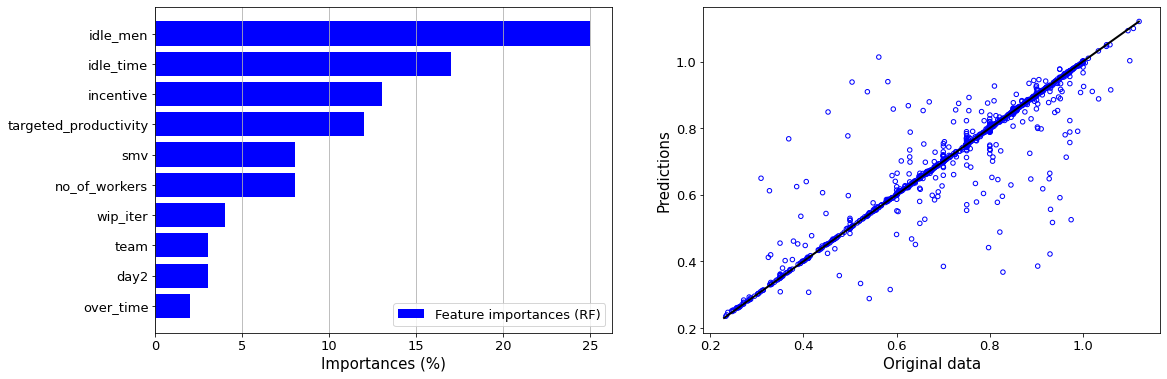

In [34]:
c1=make_GB('wip_iter',True,True)

In [35]:
def make_GB2(var='wip_knn_25',pr=False,plot2=False):
    # Labels are the values we want to predict
    labels = np.array(data['actual_productivity'])# Remove the labels from the features
    # axis 1 refers to the columns
    features=data[['team', 'targeted_productivity', 'smv', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers',
       'year2', 'day2', 'month2', 'quarter_Quarter1',
       'quarter_Quarter2', 'quarter_Quarter3', 'quarter_Quarter4',
       'quarter_Quarter5', 'department_finishing', 'department_sweing',
       'day_Monday', 'day_Saturday', 'day_Sunday', 'day_Thursday',
       'day_Tuesday', 'day_Wednesday', var]]#
    # Saving feature names for later use
    feature_list = list(features.columns)
    # Convert to numpy array
    features = np.array(features)

    X_train, X_test, y_train, y_test = train_test_split(features, labels, random_state=rs, test_size=0.25)
    
    gbm_param_grid = {
     #'colsample_bytree': np.linspace(0.5, 0.9, 5),
     'n_estimators':[100, 400, 600, 1000],
     'max_depth': [10, 15, 20, 25, 30],
#    'learning_rate': [0.1,0.01,0.001]
    }
    
    gbm = GradientBoostingRegressor(random_state = rs)
    
    grid_mse = GridSearchCV(estimator = gbm, param_grid = gbm_param_grid, scoring = 'neg_mean_squared_error', cv = 5, verbose = 1)
    
    grid_mse.fit(X_train, y_train)
    best=grid_mse.best_params_
    print("Best parameters found: ",best)
    print("Lowest RMSE found: ", np.sqrt(np.abs(grid_mse.best_score_)))
    
    gbm = xgb.XGBRegressor(**best,random_state = rs)
    gbm.fit(X_train, y_train)
    
    predictions = gbm.predict(features)
    print("Root mean square error for test dataset: {}".format(np.round(np.sqrt(mean_squared_error(labels, predictions)), 2)))
    # Calculate the absolute and square errors
    errors = abs(predictions - labels)
    errors2 = (predictions - labels)**2
    # Calculate mean absolute percentage error (MAPE)
    mape = 100 * (errors / labels)
    # Calculate and display accuracy
    accuracy = 100 - np.mean(mape)
    # Correlation:
    corrcoef=np.corrcoef(labels,predictions)[0][1]
    # Get numerical feature importances
    importances = gbm.feature_importances_.astype(np.float64)
    # List of tuples with variable and importance
    #feature_importances = np.array([[feature, round(importance.astype("float64"), 2)] for feature, importance in zip(feature_list, importances)])
    # Sort the feature importances by most important first
    feature_importances = pd.DataFrame(np.array([feature_list,np.round(importances,2)]).T,
                                       columns=["Features","Importances"]).sort_values(by="Importances",ascending=False)
    feature_importances["Importances"]=feature_importances["Importances"].astype(np.float64)
    feature_importances2=feature_importances[:10]

    if pr:
        # Print out the mean absolute error (mae)
        print('Mean Absolute Error (MAE):', round(np.mean(errors), 4))
        # Print out the mean square error (mse)
        print('Mean Square Error (MSE):', round(np.mean(errors2), 4))
        print('Root Mean Square Error (RMSE):', round(np.sqrt(np.mean(errors2)), 4))
        # Print out the mape (mape)
        print('Mean Absolute Percentage Error (MAPE):', round(np.mean(mape), 4))
        print('Accuracy:', round(accuracy, 2), '%.')
        print('Correlation coeficient:', round(corrcoef, 2))
        # Print out the feature and importances 
        #print(feature_importances)
    if plot2:
        plt.figure(figsize=(18,6))
        plt.subplot(121)
        plt.barh(feature_importances2["Features"][::-1], feature_importances2["Importances"][::-1]*100, label="Feature importances (RF)", color="b")
        plt.xlabel("Importances (%)",fontsize=15)
        plt.grid(axis='x')
        plt.legend(ncol=2, loc="lower right", frameon=True)
        plt.subplot(122)
        plt.scatter(labels,predictions,color='b',s=20,marker='o', facecolors='none')
        plt.plot(np.linspace(0.23,1.12,5),np.linspace(0.23,1.12,5),c='k')
        plt.xlabel("Original data",fontsize=15)
        plt.ylabel("Predictions",fontsize=15)
        plt.show()
    return predictions,feature_importances#rs,round(accuracy,2),round(corrcoef,4),round(np.mean(errors),4),round(np.sqrt(np.mean(errors2)),4)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters found:  {'max_depth': 10, 'n_estimators': 100}
Lowest RMSE found:  0.1497542894701708
Root mean square error for test dataset: 0.06
Mean Absolute Error (MAE): 0.0208
Mean Square Error (MSE): 0.0041
Root Mean Square Error (RMSE): 0.0639
Mean Absolute Percentage Error (MAPE): 3.173
Accuracy: 96.83 %.
Correlation coeficient: 0.93


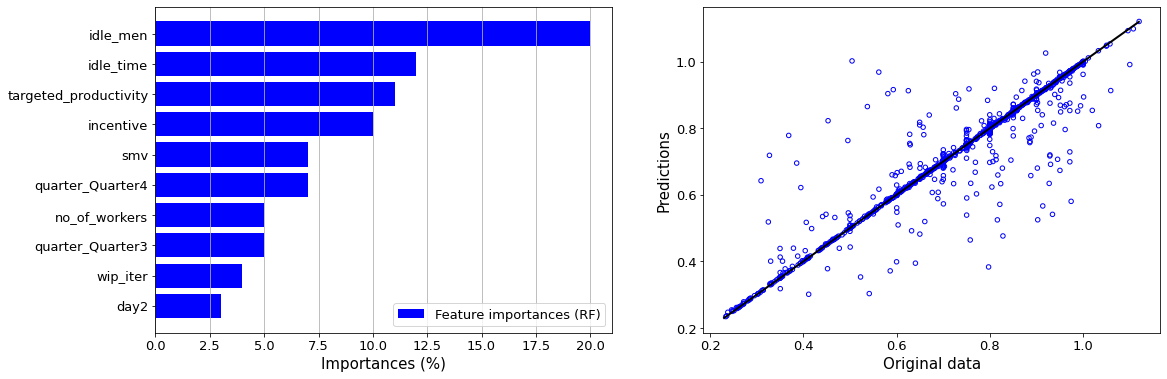

In [36]:
c2=make_GB2('wip_iter',True,True)

In [40]:
predictions_results=pd.DataFrame(np.array([a1[0],a2[0],b1[0],b2[0],c1[0],c2[0],data["actual_productivity"]]).T,columns=["RF","RF2","XGB","XGB2","GB","GB2","Original"])

In [41]:
predictions_results.to_csv("predictions_results.csv",index=False)

In [42]:
a1[1].to_csv("features_importances_RF.csv",index=False)
a2[1].to_csv("features_importances_RF2.csv",index=False)
b1[1].to_csv("features_importances_XGB.csv",index=False)
b2[1].to_csv("features_importances_XGB2.csv",index=False)
c1[1].to_csv("features_importances_GB.csv",index=False)
c2[1].to_csv("features_importances_GB2.csv",index=False)